In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
sns.set_theme(style = 'darkgrid')

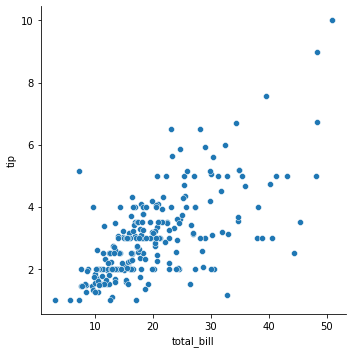

In [8]:
tips = sns.load_dataset('tips')
sns.relplot(x='total_bill', y='tip', data = tips)

PENGGUNAAN RELPLOT UNTUK DATA RELATIONAL (SCATTERPLOT DAN LINEPLOT)
UNTUK MEMBERIKAN WARNA MENGGUNAKAN HUE

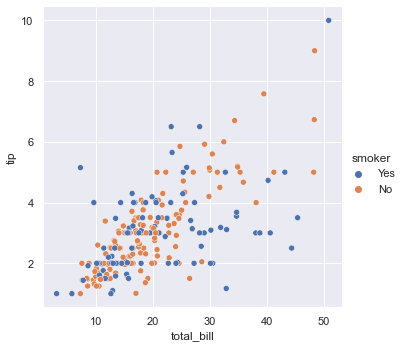

In [14]:
sns.relplot(x='total_bill', y='tip', hue='smoker', data=tips)

UNTUK MEMPERMUDAH PEMBACAAN DATA MENGGUNAKAN STYLE YANG BERBEDA

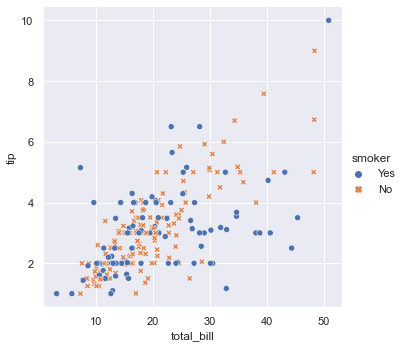

In [21]:
sns.relplot(x="total_bill", y="tip", hue='smoker', style='smoker',data=tips)

BISA JUGA MEMBEDAKAN PLOT DATA DENGAN MEMBEDAKAN BENTUK DAN WARNA DARI MACAM2 OBJEK

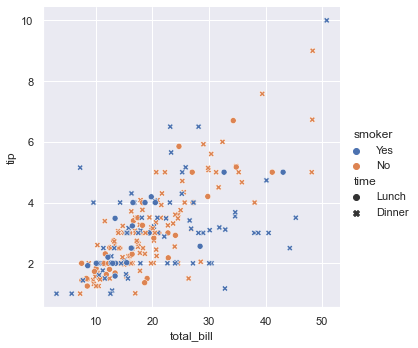

In [23]:
sns.relplot(x='total_bill', y='tip', hue='smoker',style='time', data=tips)

KITA JUGA BISA MENAMPILKAN DATA MENJADI GRADASI WARNA APABILA ADA DATA YANG BERBENTUK FLOAT DAN MEMBUTUHKAN PERUBAHAN YANG SIGNIFIKAN

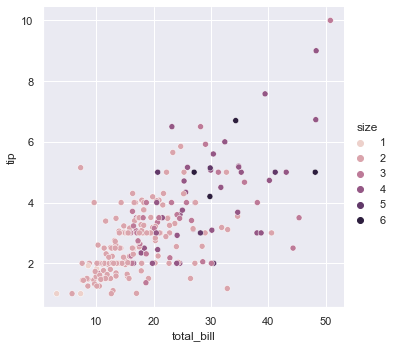

In [25]:
sns.relplot(x='total_bill', y='tip',hue='size' , data=tips)

Merubah warna pallete

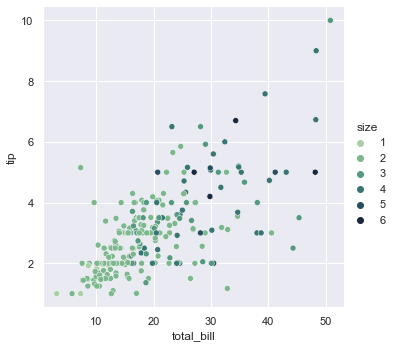

In [27]:
sns.relplot(x='total_bill',y='tip', hue='size', palette='ch:r=-.5,l=.75', data=tips)

Mengvisualisasikan data berdasarkan ukuran datanya

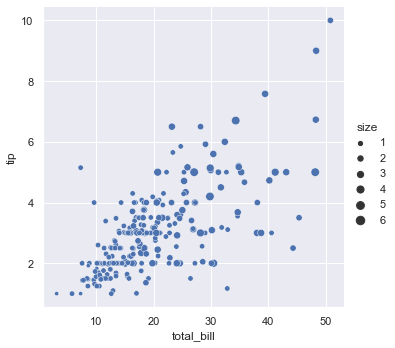

In [29]:
sns.relplot(x='total_bill',y='tip', size='size', data=tips)

perbedaannya kalo kita menggunakan matplotlib scatter titiknya bukan menunjukkan letak data, kalo di seaborn size menunjukkan jarak besaran suatu data.

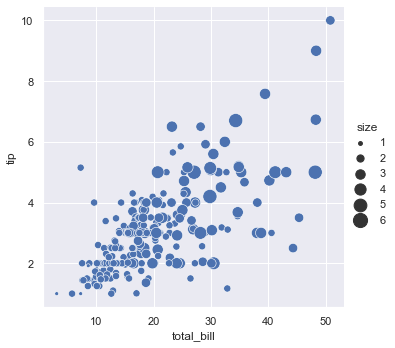

In [35]:
sns.relplot(x='total_bill', y='tip', size='size', sizes=(15, 200), data=tips)

PLOT KESINAMBUNGAN DENGAN LINEPLOT

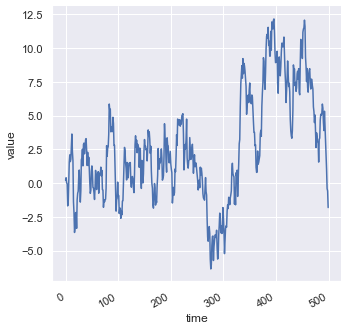

In [52]:
df = pd.DataFrame(dict(time=np.arange(500), value=np.random.randn(500).cumsum()))
g = sns.relplot(x='time', y='value', kind='line', data=df)
g.figure.autofmt_xdate()

In [ ]:
Because lineplot() assumes that you are most often trying to draw y as a function of x, 
the default behavior is to sort the data by the x values before plotting. However, this can be disabled:

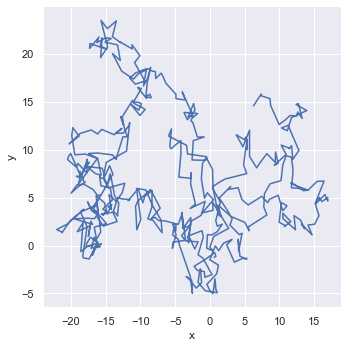

In [89]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x","y"])
sns.relplot(x='x', y='y', sort=False, kind='line', data=df)
 


AGREGRASI DAN MEWAKILI KETIDAKPASTIAN
Kumpulan data yang lebih kompleks akan memiliki beberapa pengukuran untuk nilai variabel x yang sama. Perilaku default di seaborn adalah menggabungkan beberapa pengukuran pada setiap nilai x dengan memplot mean dan interval kepercayaan 95% di sekitar mean:

In [90]:
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


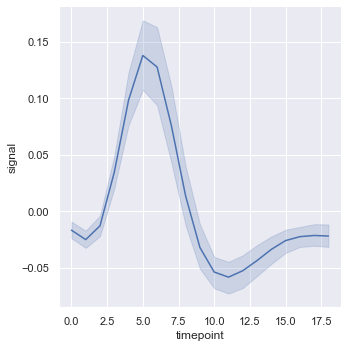

In [91]:
sns.relplot(x='timepoint', y='signal', kind='line', data=fmri)

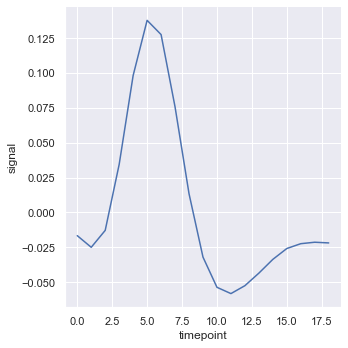

In [92]:
sns.relplot(x='timepoint', y='signal', ci=None, kind='line', data=fmri)

untuk data yang besar, kita bisa menunjukkan sebaran data dari setiap timepoint dengan melakukan plotting standard deviasi

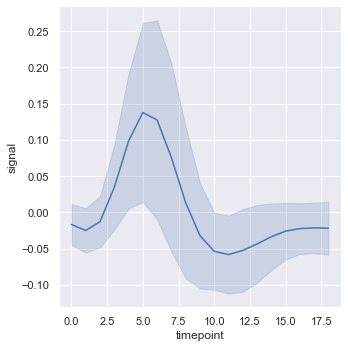

In [94]:
sns.relplot(x='timepoint', y='signal', ci='sd', kind='line', data=fmri)

untuk mematikan aggregasi, set parameter estimator ke None. chartnya bakalan aneh ketika data mempunyai banyak observasi pada tiap titik.

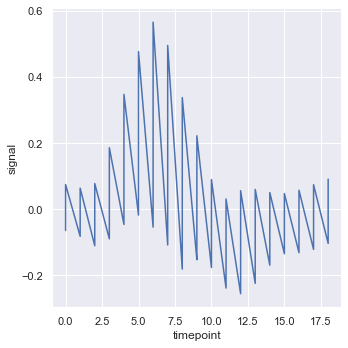

In [95]:
sns.relplot(x='timepoint', y='signal', estimator=None, kind='line',data=fmri)

MELAKUKAN PLOTTING DATA SUBSEST DENGAN SEMANTIC MAPPINGS
Fungsi lineplot() memiliki fleksibilitas yang sama seperti scatterplot(): ia dapat menampilkan hingga tiga variabel tambahan dengan memodifikasi rona, ukuran, dan gaya elemen plot. Ia melakukannya menggunakan API yang sama dengan scatterplot(), artinya kita tidak perlu berhenti dan memikirkan parameter yang mengontrol tampilan garis vs. titik di matplotlib.
Menggunakan semantik di lineplot() juga akan menentukan bagaimana data dikumpulkan. Misalnya, menambahkan semantik rona dengan dua tingkat membagi plot menjadi dua garis dan pita kesalahan, mewarnai masing-masing untuk menunjukkan subset data mana yang sesuai dengannya.

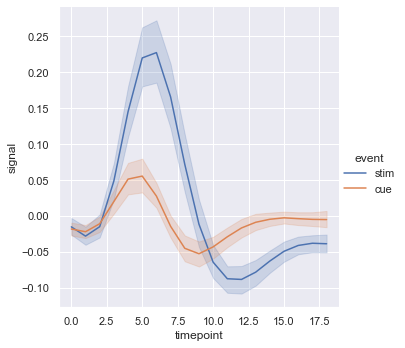

In [96]:
sns.relplot(x='timepoint', y='signal',hue='event', kind='line', data=fmri)

menambahkan semantic style pada line plot dengan mengganti style garisnya

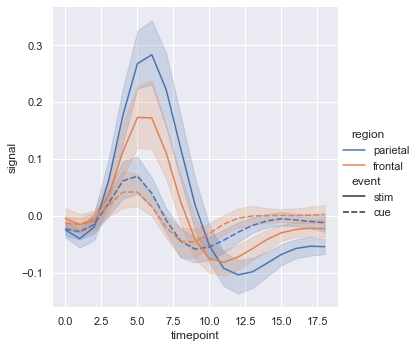

In [97]:
sns.relplot(x='timepoint', y='signal', hue='region', style='event', kind='line', data=fmri)

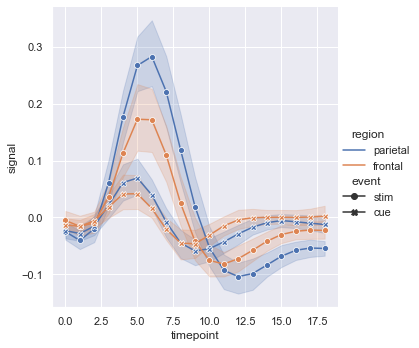

In [99]:
sns.relplot(x='timepoint', y='signal', hue='region', style='event',
            dashes=False, markers=True, kind='line', data=fmri)

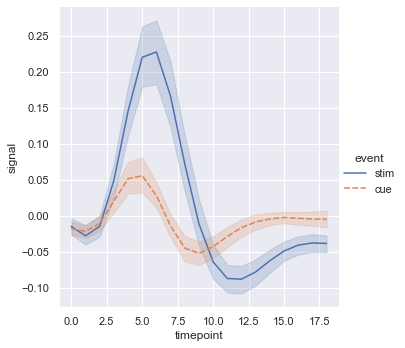

In [100]:
sns.relplot(x='timepoint', y='signal', hue='event', style='event', kind='line',data=fmri)

kalo punya banyak data yang diukur secara berulang kali biar ngga pusing membedakannya bisa di plot tiap sampling dengan beda. 

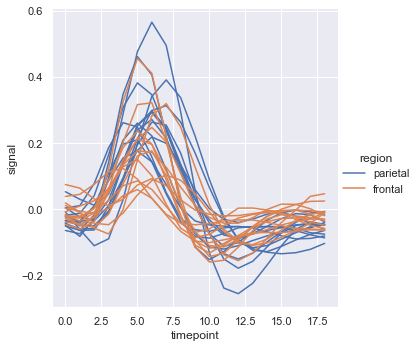

In [102]:
sns.relplot(x='timepoint', y='signal', hue='region', 
            units='subject', estimator=None, kind='line', data=fmri.query("event == 'stim'"))

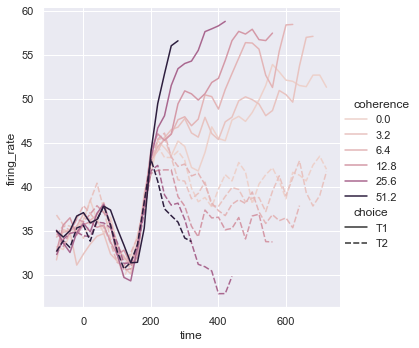

In [121]:
dots = sns.load_dataset('dots').query("align == 'dots'")
sns.relplot(x='time', y='firing_rate', 
            hue='coherence', style='choice'
            ,kind='line', data=dots)

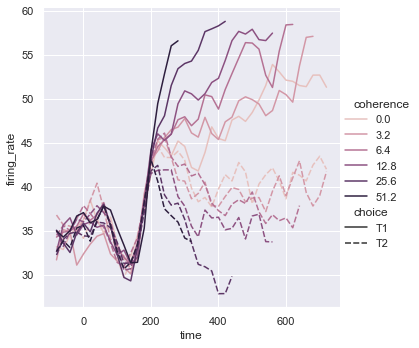

In [104]:
palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(x='time', y='firing_rate',
            hue='coherence', style='choice',
            palette=palette,
            kind='line', data=dots)

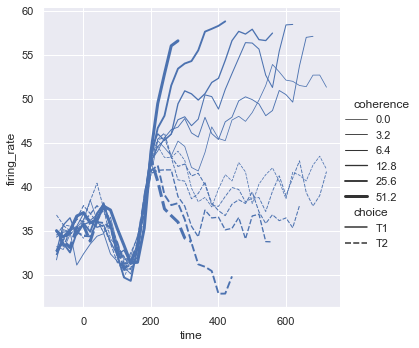

In [105]:
sns.relplot(x='time', y='firing_rate', size='coherence', style='choice',
            kind='line', data=dots)

UNTUK MERUBAH BESAR KECIL GARIS

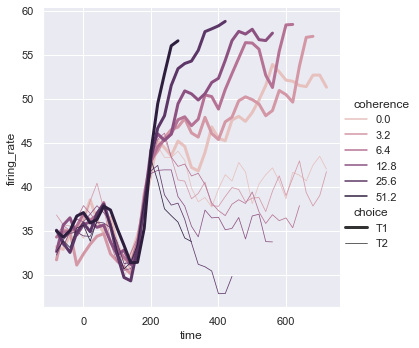

In [110]:
sns.relplot(x='time', y='firing_rate', 
            hue='coherence', size='choice',
            palette=palette, 
            kind='line', data=dots)

Plotting data tanggal
Plot garis sering digunakan untuk memvisualisasikan data yang terkait dengan tanggal dan waktu nyata. Fungsi-fungsi ini meneruskan data dalam format aslinya ke fungsi matplotlib yang mendasarinya, sehingga mereka dapat memanfaatkan kemampuan matplotlib untuk memformat tanggal dalam label centang. Tetapi semua pemformatan itu harus dilakukan di lapisan matplotlib, dan Anda harus merujuk ke dokumentasi matplotlib untuk melihat cara kerjanya:

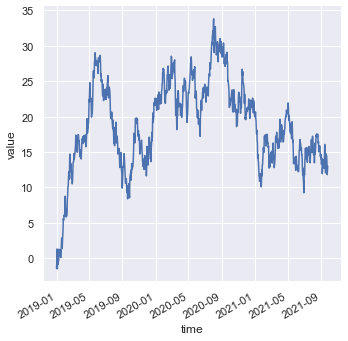

In [114]:
df = pd.DataFrame(dict(time=pd.date_range("2019-1-1", periods=1000),
                    value=np.random.randn(1000).cumsum()))
g = sns.relplot(x='time', y='value', kind='line', data=df)
g.figure.autofmt_xdate()

MENAMPILKAN BEBERAPA KETERHUBUNGAN DENGAN FACETS

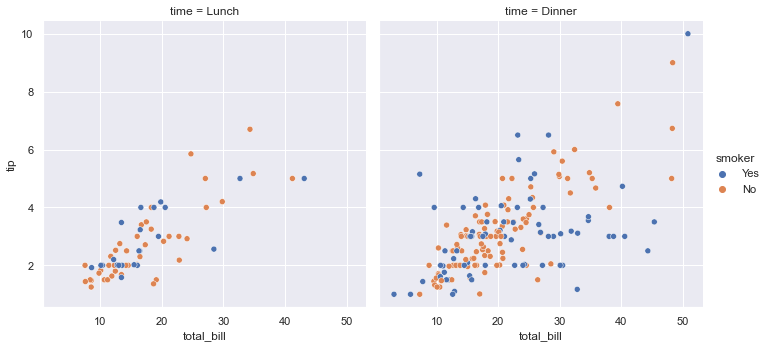

In [115]:
sns.relplot(x='total_bill', y='tip',hue='smoker', 
            col='time',data=tips)

kita juga bisa bikin beberapa facet seperti yang satu mengahadap kolom dan yang satu menghadap ke baris

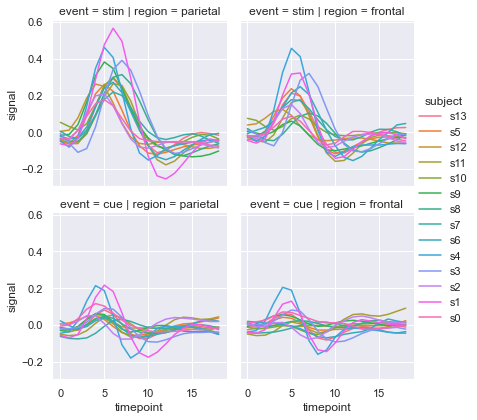

In [116]:
sns.relplot(x='timepoint', y='signal', hue='subject',
            col='region', row='event', height=3,
            kind='line', estimator=None, data=fmri)

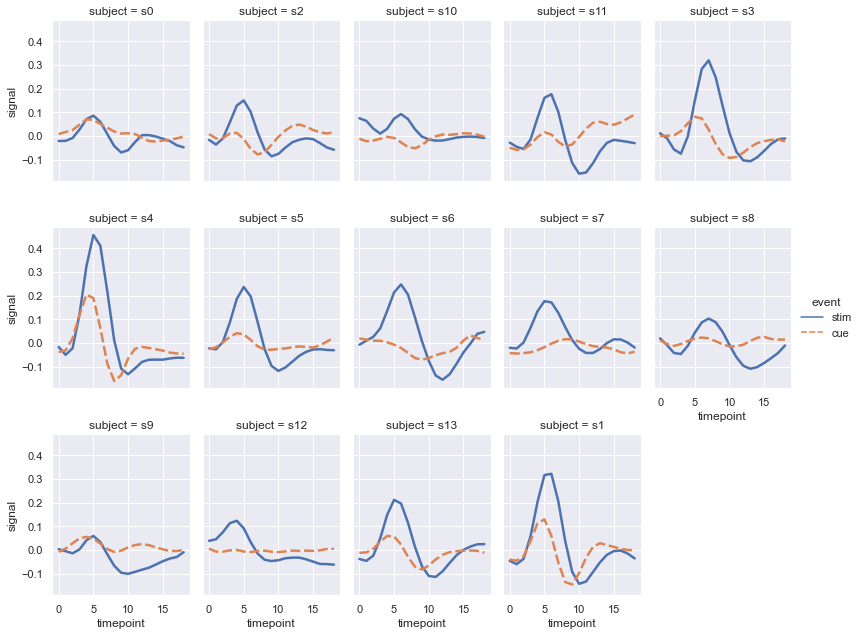

In [117]:
sns.relplot(x='timepoint', y='signal', hue='event', style='event', 
            col='subject', col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind='line', data=fmri.query("region == 'frontal'"))

In [124]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


PLOTTING HISTOGRAM

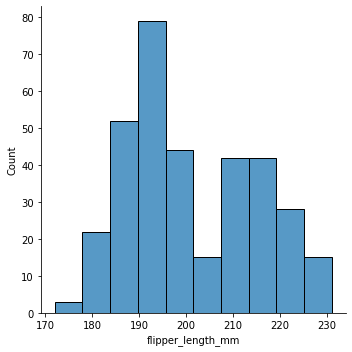

In [7]:
penguins = sns.load_dataset('penguins')
penguins.head()
sns.displot(penguins, x = 'flipper_length_mm')

CATEGORICAL SCATTERPLOT

In [9]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


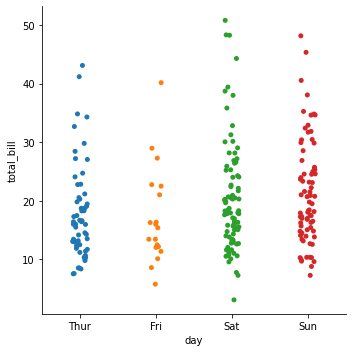

In [10]:
sns.catplot(x='day', y='total_bill', data=tips)

Linear Regression

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

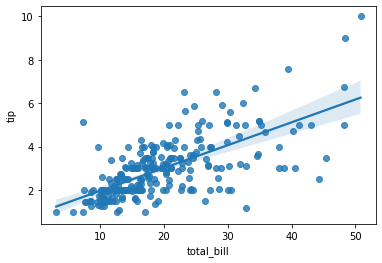

In [11]:
sns.regplot(x='total_bill', y='tip', data=tips)

In [16]:
anscombe= sns.load_dataset('anscombe')

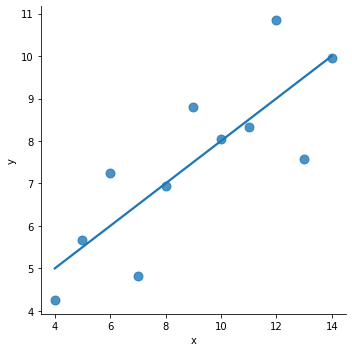

In [17]:
sns.lmplot(x='x', y='y', data=anscombe.query("dataset =='I'"),
            ci=None, scatter_kws={'s':80})

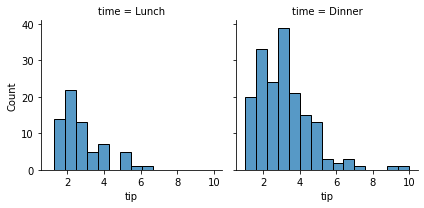

In [20]:
tips = sns.load_dataset('tips')
g = sns.FacetGrid(tips, col='time')
g.map(sns.histplot, 'tip')

AESTHETIC PLOT

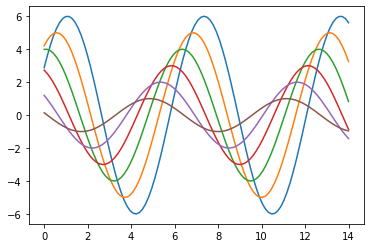

In [27]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin( x+i * .5) * (7 - i) * flip)
sinplot()